# Introduction

Welcome to this Exploratory Data Analysis of the Netflix. Our aim is to delve into the data and uncover valuable insights.

We'll be focusing on:

- Analyzing the distribution of genres
- Examining the distribution of countries
- Investigating the distribution of ratings
- Exploring the distribution of duration
- Understanding the yearly and monthly trends in content additions
- Gaining insights from content descriptions using WordCloud

For visualizations, we'll be using libraries such as seaborn, pyplot, plotly, wordCloud, and missingno. Some of the visuals will be interactive, while others will be static.

The outline of this notebook is as follows:

1. Basic Data Exploration
   - Feature Exploration
   - Summary Statistics
2. Data Cleaning
   - Null Value Analysis
   - Checking for Duplicate Values
   - Handling Inconsistent or Incorrect Data
3. EDA

In [ ]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('netflix.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In this dataset we have,
* Type identifier; Movie or Tv Show
* Titles
* Directors
* Actors
* Country where the Movie or Tv Show was produced
* Date it was added on Netflix
* Actual Release year of the Content
* Ratings
* Total Duration - in minutes or number of seasons

In [ ]:
# Basic data exploration
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include='number')
numerical_features.describe().T


,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [ ]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include='object')
categorical_features.describe().T


,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [ ]:
# Check for missing values
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

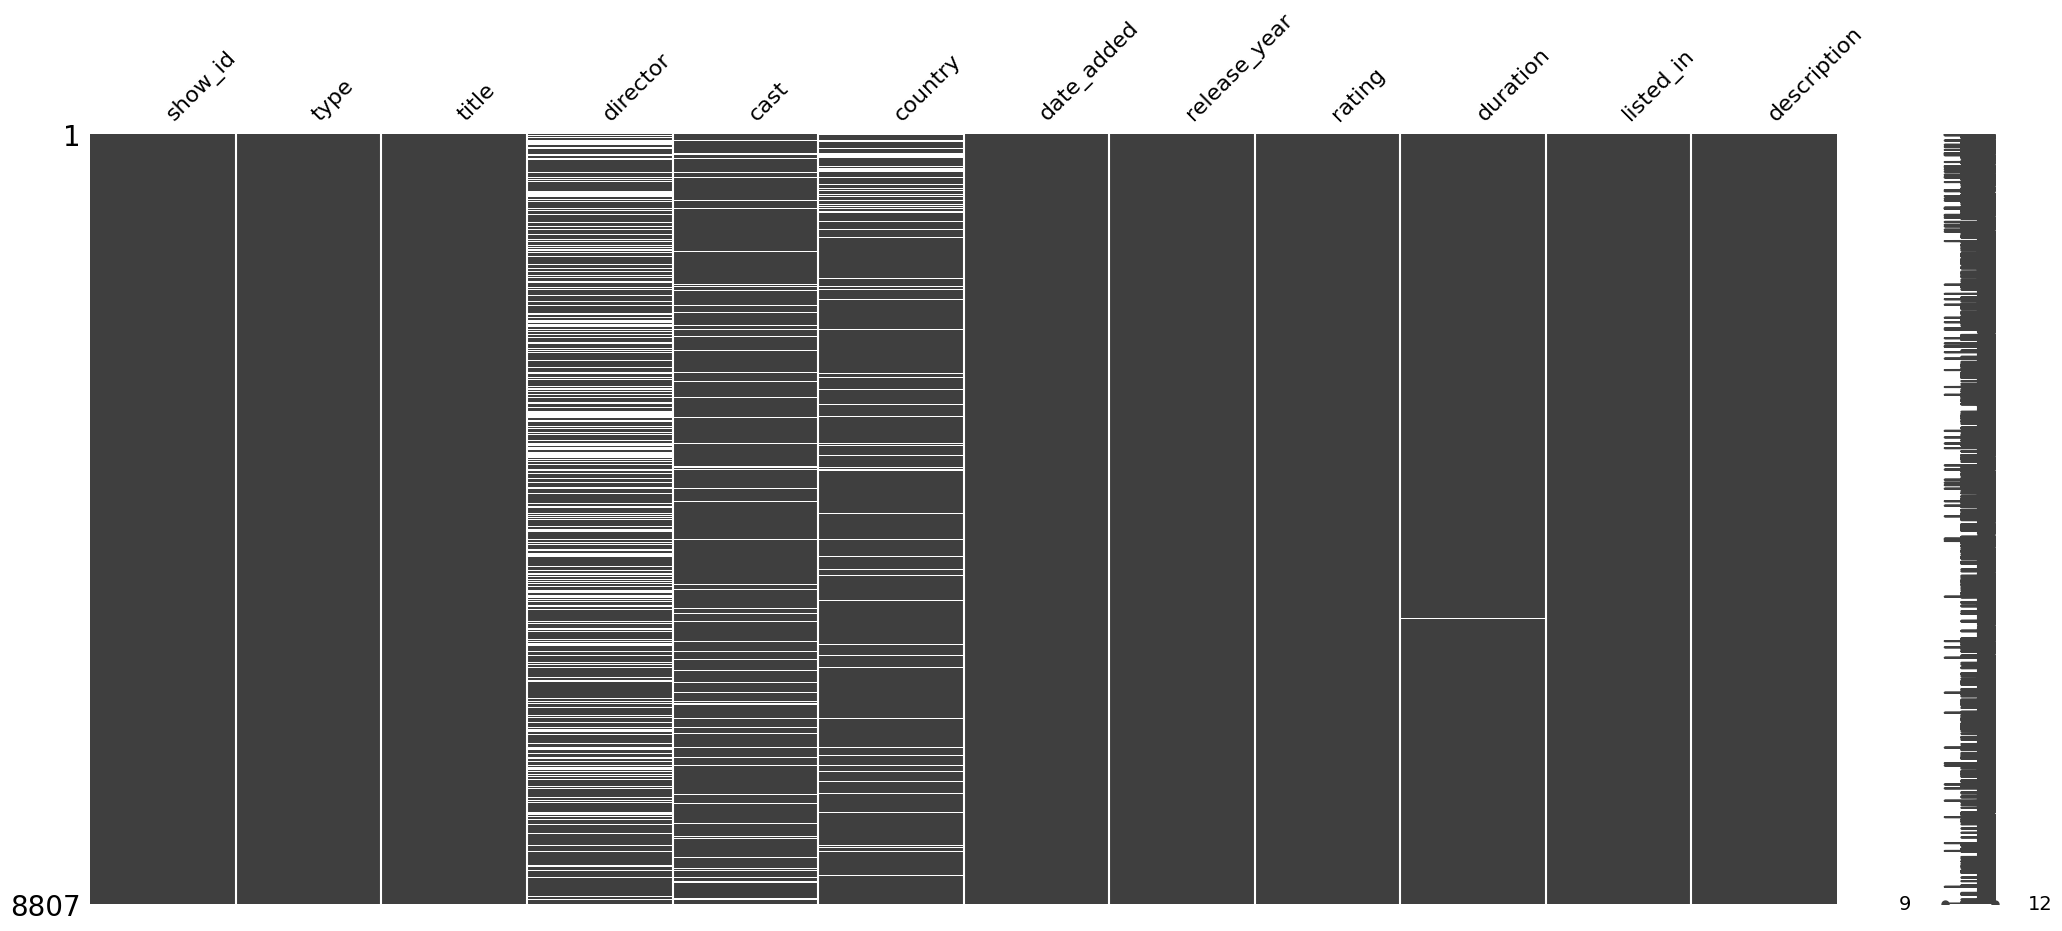

In [ ]:
# Visualize missing values
msno.matrix(df)


In [ ]:
# Identify columns with missing values
def missing_value_table(df):
    null_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    null_counts = df[null_columns].isnull().sum().sort_values(ascending=True)
    null_value_rates = (df[null_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    formatted_null_value_rates = null_value_rates.apply(lambda value: f"% {str(np.round(value, 2))}")
    null_df = pd.concat([null_counts, formatted_null_value_rates], axis=1, keys=["Null Value Count", "Null Value Rates"])
    return null_df

missing_value_table(df)


,Null Value Count,Null Value Rates
duration,3,% 0.03
rating,4,% 0.05
date_added,10,% 0.11
cast,825,% 9.37
country,831,% 9.44
director,2634,% 29.91


In [ ]:
# Replace missing values with 'missing'
columns_to_fill = missing_value_table(df).index
df[columns_to_fill] = df[columns_to_fill].fillna('missing')

# Check for null values again
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Check for duplicate values
duplicated_rows = df[df.duplicated()]
print(f"Duplicates value number in dataset: {duplicated_rows.shape[0]}")


Duplicates value number in dataset: 0


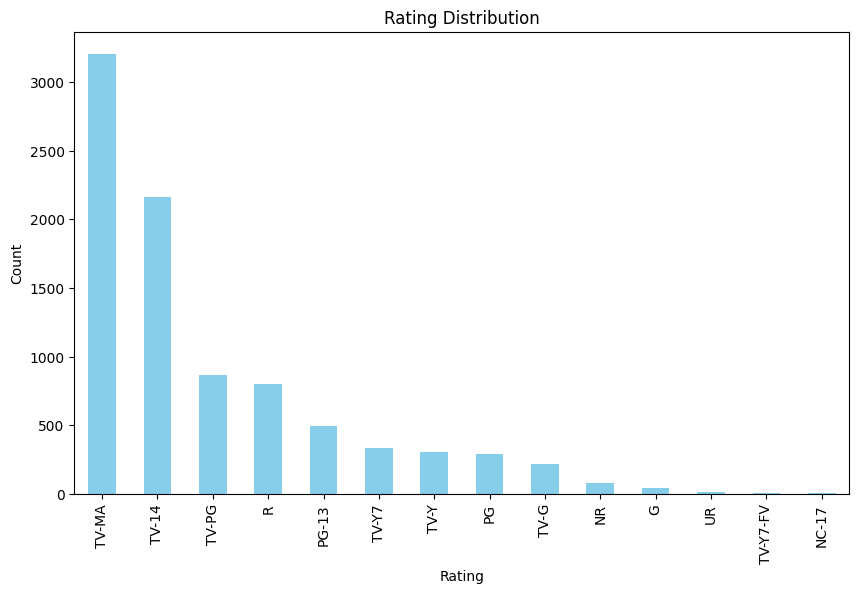

In [ ]:
# Replace incorrect rating values with 'UR'
df['rating'] = np.where(np.isin(df['rating'], ['74 min', '84 min', '66 min', 'missing']), 'UR', df['rating'])

# Visualize rating distribution
plt.figure(figsize=(10, 6))
df['rating'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()


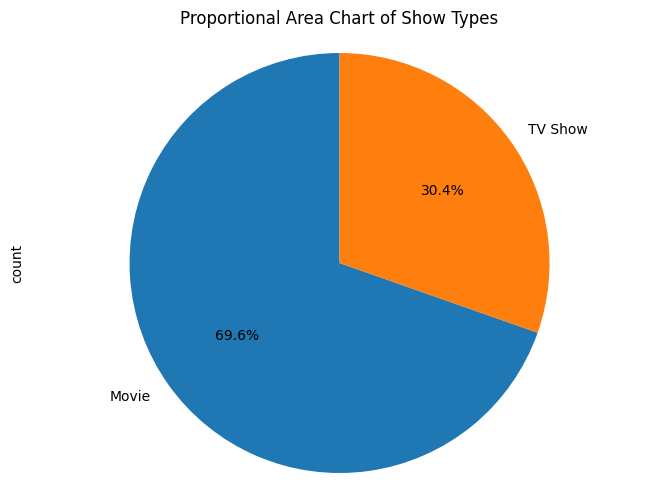

In [ ]:
# Explore content types
plt.figure(figsize=(8, 6))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportional Area Chart of Show Types')
plt.show()


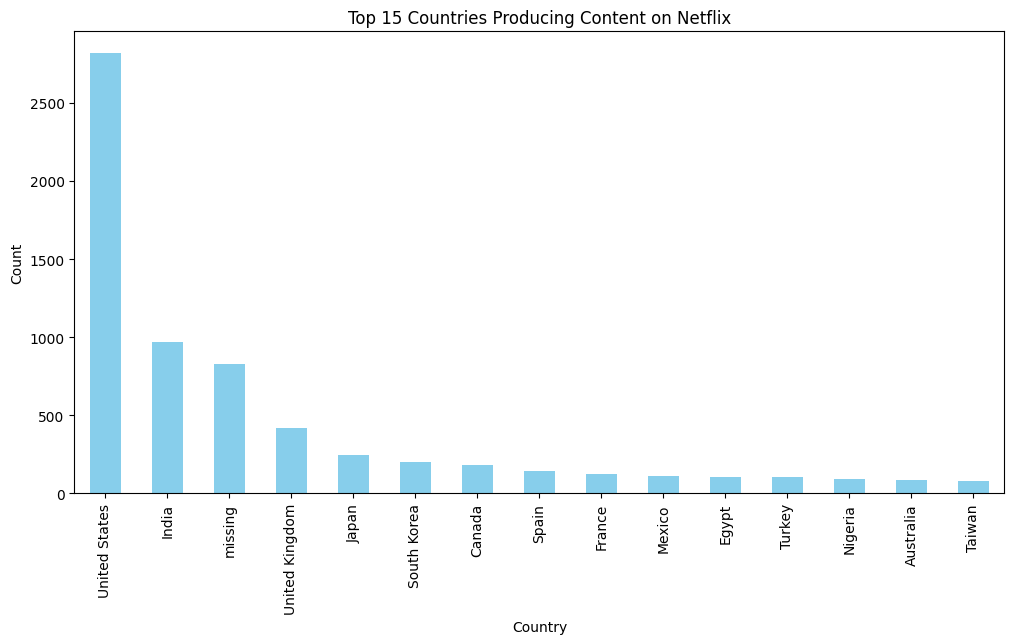

In [ ]:
# Explore content by country
plt.figure(figsize=(12, 6))
df['country'].value_counts().head(15).plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 15 Countries Producing Content on Netflix')
plt.show()


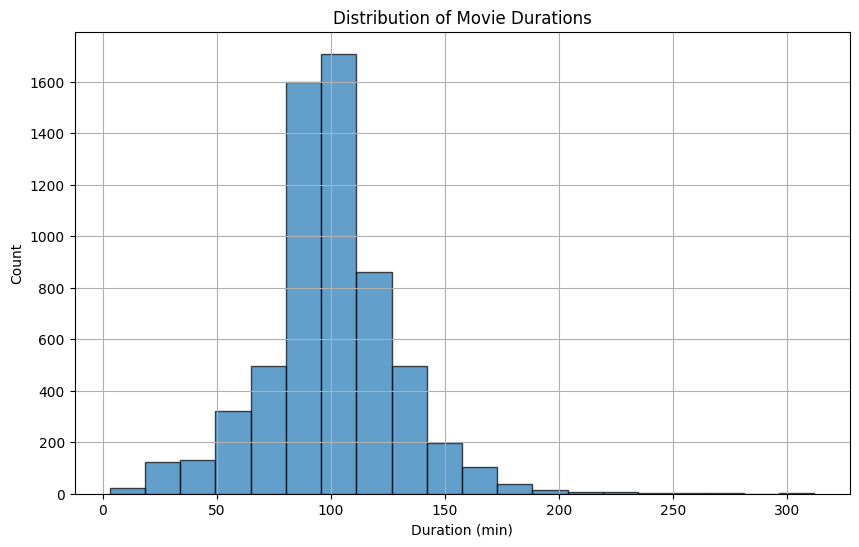

In [ ]:
# Analyze movie durations
movie_durations = df[(df['type'] == 'Movie') & (df['duration'] != 'missing')]['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(10, 6))
plt.hist(movie_durations, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.title('Distribution of Movie Durations')
plt.grid(True)
plt.show()


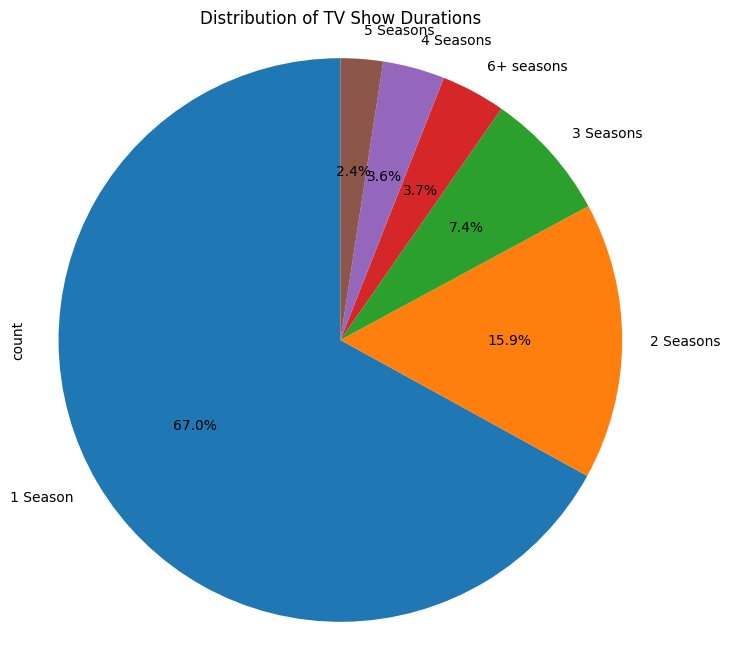

In [ ]:
# Analyze TV show durations
tv_show_durations = df[(df['type'] == 'TV Show') & (df['duration'] != 'missing')]['duration'].apply(lambda x: '6+ seasons' if int(x.split(' ')[0]) >= 6 else x)
plt.figure(figsize=(8, 8))
tv_show_durations.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TV Show Durations')
plt.axis('equal')
plt.show()


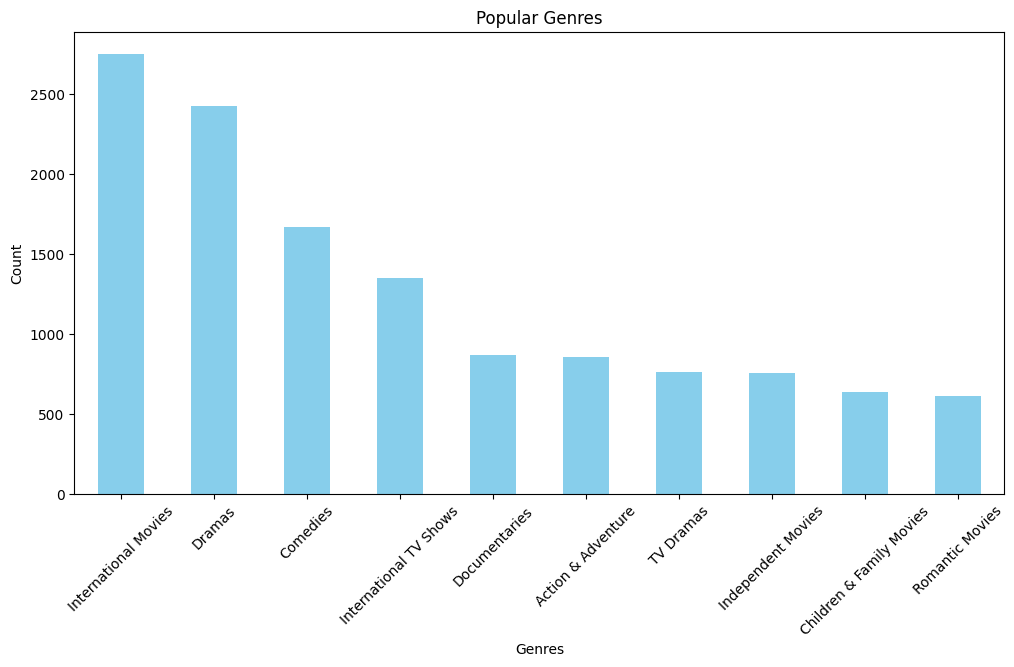

In [ ]:
# Extract genres
genres = df['listed_in'].str.split(', ').explode()

# Plot popular genres
plt.figure(figsize=(12, 6))
genres.value_counts().head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Popular Genres')
plt.xticks(rotation=45)
plt.show()


### Conclusions
In this notebook, we performed Exploratory Data Analysis of the Netflix dataset from Kaggle. We explored the data and uncovered several insights:

- Most of the content on Netflix is movies (69.6%) compared to TV shows (30.4%).
- The distribution of content by release year shows that the number of content added to Netflix increased significantly from 2014 to 2019, peaking around 2018.
- The US, India, UK, Japan, and South Korea are the top countries producing content for Netflix.
- The most common ratings on Netflix are TV-MA, TV-14, and TV-PG, indicating that the platform caters to a mature audience.
- The most popular genres on Netflix are International Movies, Dramas, and Comedies.
- The average duration of movies on Netflix is around 100 minutes, and the most common duration for TV shows is 1 season.
- Content descriptions on Netflix often feature words related to life, relationships, society, and entertainment.

This analysis provides valuable insights into the content available on Netflix, which can be useful for content creators, marketers, and viewers alike.

